Start the installs before you start reading -- you know -- for efficiency

In [1]:
%pip install qiskit qiskit-ibm-runtime qiskit-aer
!pip install pylatexenc matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     

# Grover's Algorithm

## Objectives:
* Fill in the details from Doga's lecture about Grover's Algorithm
* Implement Grover's Algorithm and run it with noise

You've heard repeatedly an advantage a quantum computer has over a classical computer is its superior speed searching databases. Grover's algorithm is perhaps the simplest example of such capabilities. This algorithm can speed up an unstructured search problem quadratically, but its uses extend beyond that; it can serve as a general trick or subroutine to obtain quadratic run time improvements. In these cases, it is also called <b>amplitude amplification</b>.

This lab is an abridged and Hankified version of https://qiskit.org/textbook/ch-algorithms/grover.html

## Ok, First...What is an Unstructured Search?

Suppose you are given a large list of $N$ items. Among these items there is one item with a unique property that we wish to locate; we will call this one the winner $w$. Think of each item in the list as a box of a particular color. Say all items in the list are gray except the winner $w$, which is purple.

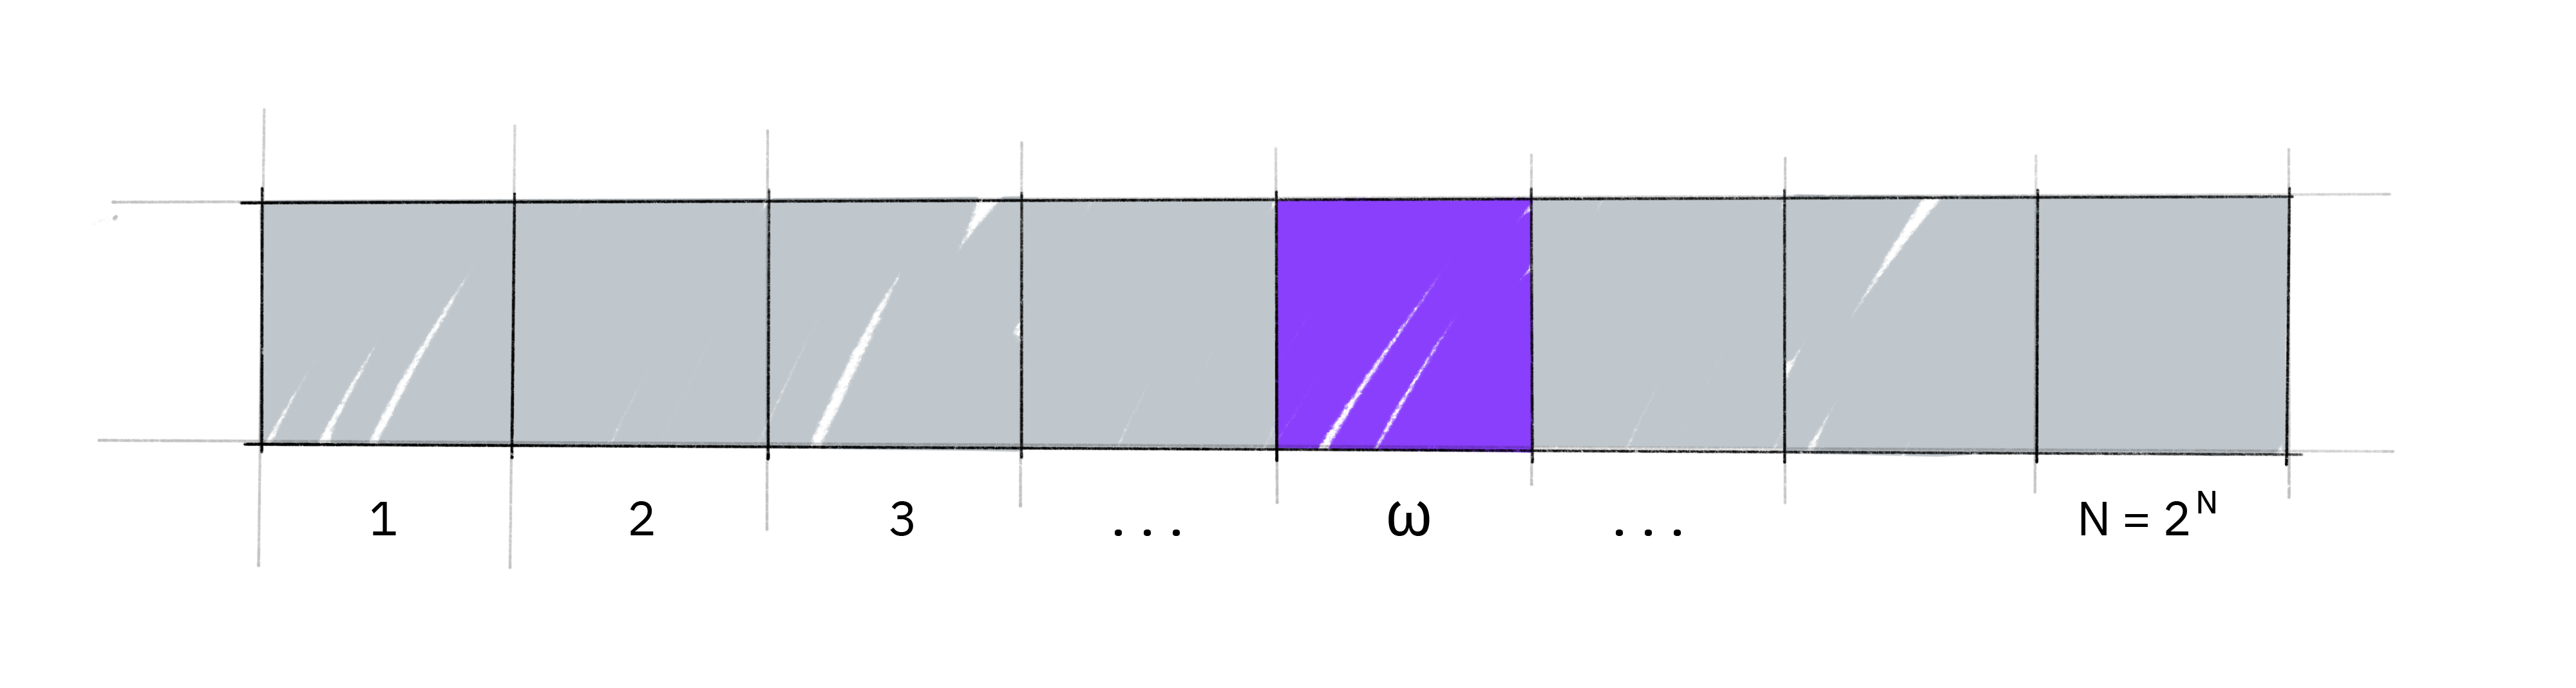

To find the purple box -- the *marked item* -- using classical computation, one would have to check on average $N/2$ of these boxes, and in the worst case, all $N$ of them. On a quantum computer, however, we can find the marked item in roughly $\sqrt{N}$ steps with Grover's amplitude amplification trick. A quadratic speedup is a lot for long lists. Additionally, the algorithm does not use the list's internal structure, which makes it *generic* and is why this is called an *unstructured search*;  this is why it immediately provides a quadratic quantum speed-up for many classical problems. Often for specialized, structured lists it is possible for faster classical and quanutm algorithms.

## Creating an Oracle

For the examples we will be working through, our 'database' is comprised of all the possible computational basis states our qubits can be in. For example, if we have 3 qubits, our list is the states $|000\rangle, |001\rangle, \dots |111\rangle$ (i.e the states $|0\rangle \rightarrow |7\rangle$).

The *oracle* a.k.a black box that Grover's algorithm uses performs one task.  If the winner basis state $|\omega\rangle$ is passed into it, it returns $-|\omega\rangle$.  For any other state, $|x\rangle$ it returns $|x\rangle$.

Think of this oracle as an actual person, who you pass a guess box, $|x\rangle$, to.  They then reveal to you that the box you choose was either gray (a losing state) or purple (the winner).  In math, we denote the oracle $U_\omega$ acting on a basis state as:

$$
U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}
$$

This oracle will be a <b>diagonal matrix</b>, where the entry that correspond to the marked item will have a <b>negative phase</b>. For example, if we have three qubits and $\omega = \text{101}$, our oracle will have the matrix:

$$
U_\omega =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\\
\\
\\
\leftarrow \omega = \text{101}\\
\\
\\
\\
\end{aligned}
$$


What makes Grover’s algorithm so powerful is how easy it is to convert a problem to an oracle of this form. There are many problems where it’s difficult to _find_ a solution, but easy to _verify_ a solution. For example, we can easily verify a solution to a [sudoku](https://en.wikipedia.org/wiki/Sudoku) by checking that it doesn't break any rules. For such problems, we can create a function $f$ that takes a proposed solution $x$, and returns $f(x) = 0$ if $x$ is not a solution ($x \neq \omega$) and $f(x) = 1$ for a valid solution ($x = \omega$). Our oracle can then be described as:

$$
U_\omega|x\rangle = (-1)^{f(x)}|x\rangle
$$

and the oracle's matrix will be a diagonal matrix of the form:

$$
U_\omega =
\begin{bmatrix}
(-1)^{f(0)} &   0         & \cdots &   0         \\
0           & (-1)^{f(1)} & \cdots &   0         \\
\vdots      &   0         & \ddots & \vdots      \\
0           &   0         & \cdots & (-1)^{f(2^n-1)} \\
\end{bmatrix}
$$

If we have our classical function $f(x)$, we can convert it to a reversible circuit of the form:

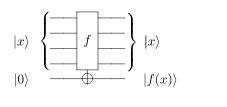

If we initialise the 'output' qubit in the state $|{-}\rangle$, the phase kickback effect turns this into a Grover oracle (similar to the workings of the Deutsch-Jozsa oracle):

![](attachment:grover_phase_oracle.svg)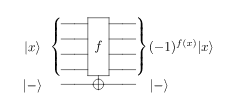

At first, you are going to create example oracles where we know $\omega$ beforehand which are admitably pointless. At the end of the chapter, you will create and oracle for sudoku where $\omega$ is much harder to identify.

### Amplitude Amplification

So how does the algorithm work? Before looking at the list of items, we have no idea where the marked item is. Therefore to us, the probability of any item being the right one is the same.  If you remember that probabilities are the square of the amplitudes, this suggests that a quantum state denoting our ignorance is a uniform superposition: $|s \rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x
\rangle.$

If we measured this superposition, we would find each basis states with probability of $\frac{1}{N} = \frac{1}{2^n}$. Hence, on average we must try about $N/2 = 2^{n-1}$ times to guess $|w\rangle$.

The idea of amplitude amplification is that there are quantum ways of increasing the amplitude (and thus probability) of $|w\rangle$ so when we perform a measurement, it becomes the most likely state.

This algorithm has a nice geometrical interpretation. Consider the winner $| w \rangle$ and the uniform superposition $| s \rangle$. These two vectors span a two-dimensional plane. They are not orthogonal because $| w \rangle$ occurs in $| s \rangle$. We can, however, introduce an additional state $|s'\rangle$ that is perpendicular to $| w \rangle$ and is obtained from $|s \rangle-|w\rangle$ and
rescaling.

**Step 1**: The amplitude amplification procedure starts out in the uniform superposition $| s \rangle$, which is easily constructed from $| s \rangle = H^{\otimes n} | 0 \rangle^n$.

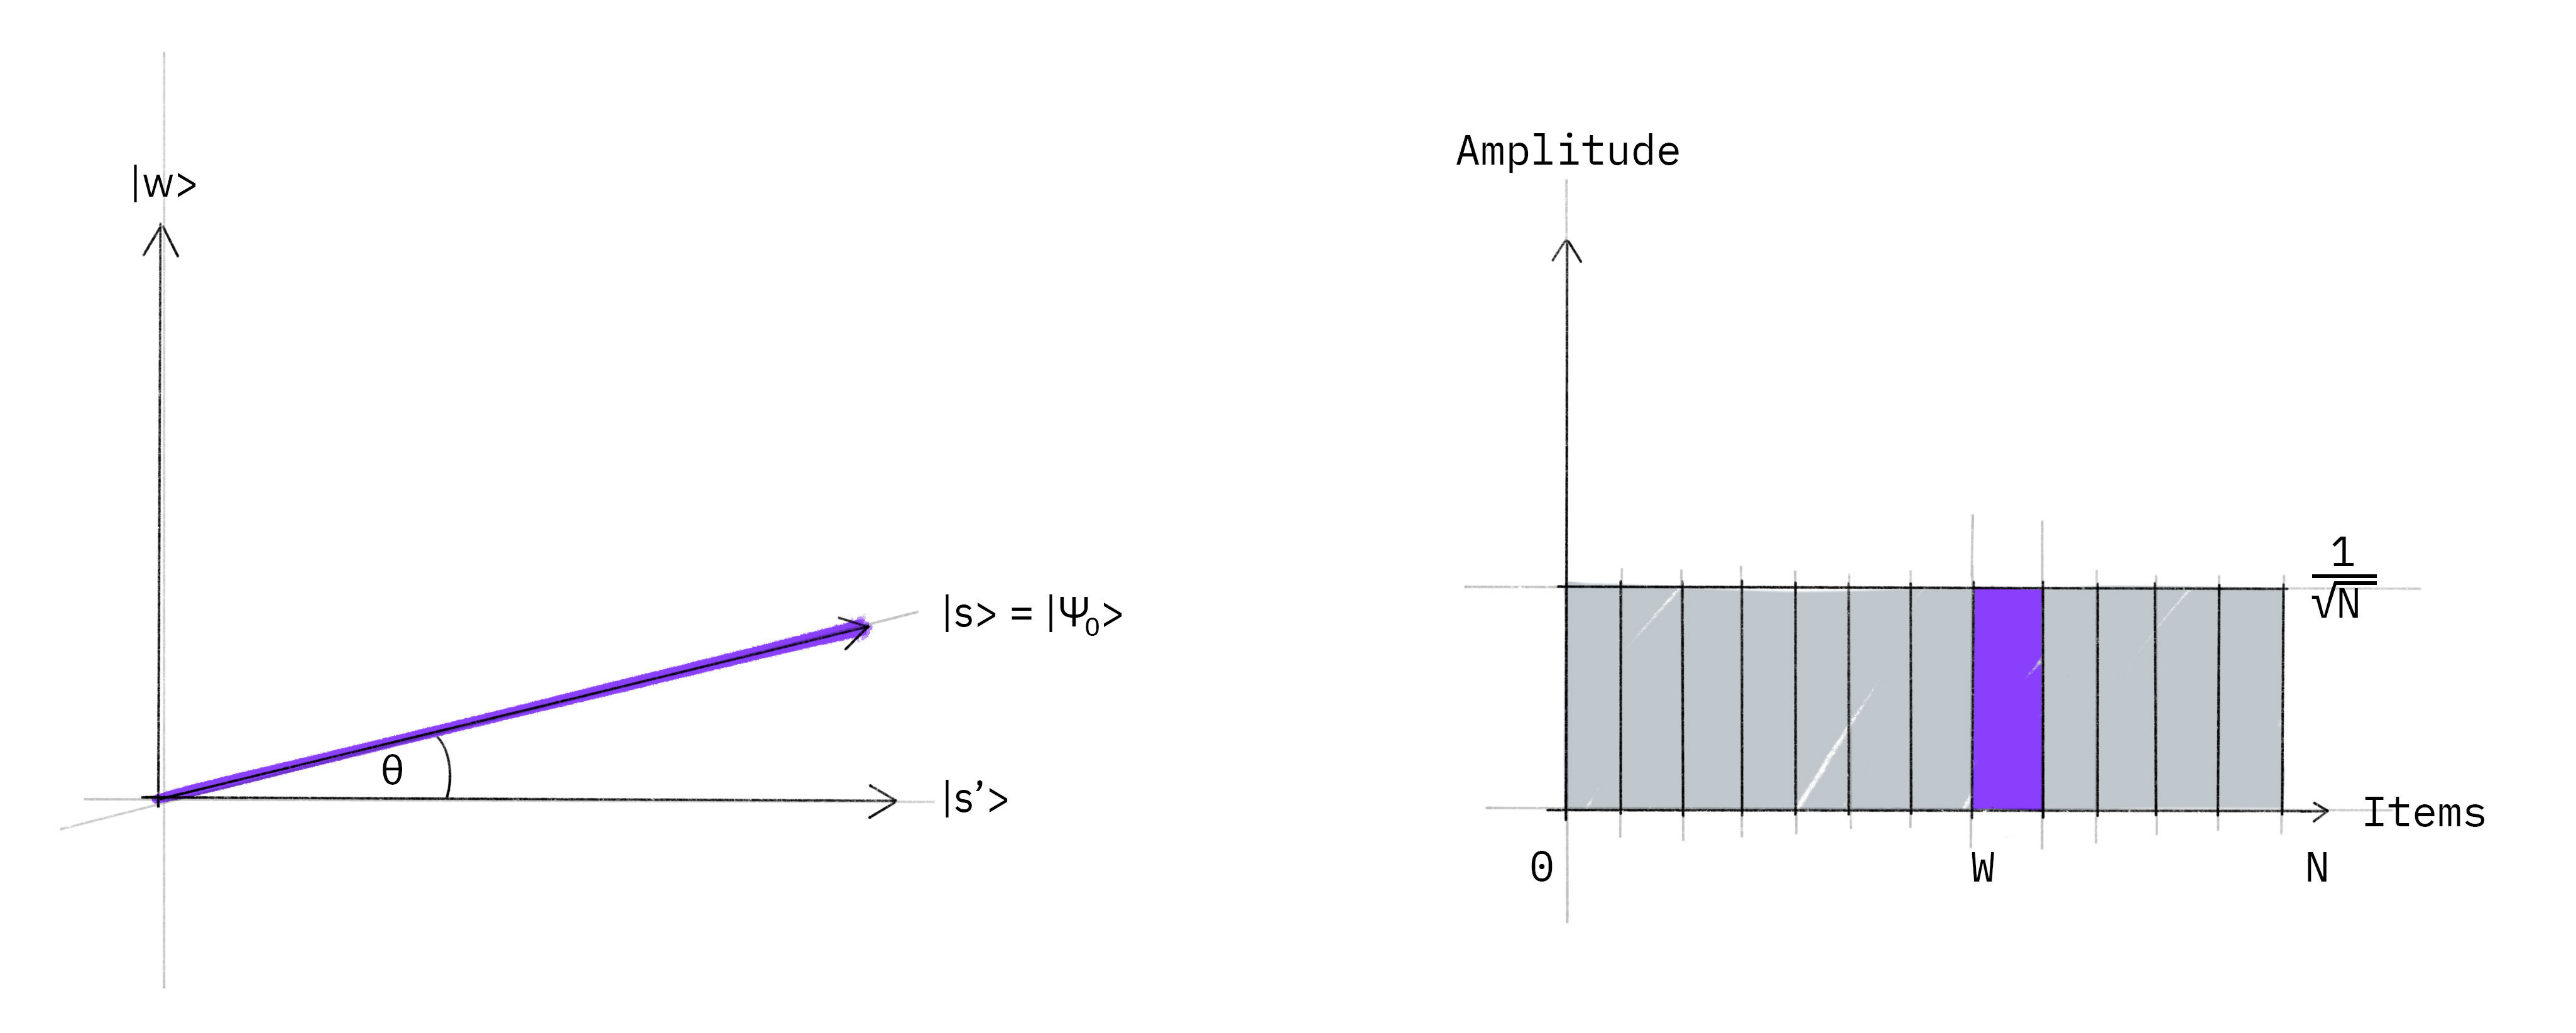

The left graphic corresponds to the two-dimensional plane spanned by perpendicular vectors $|w\rangle$ and $|s'\rangle$. In this plane, $|s\rangle = \sin \theta | w \rangle + \cos \theta | s' \rangle,$ where $\theta = \arcsin \langle s | w \rangle = \arcsin \frac{1}{\sqrt{N}}$. The right graphic is a bar graph of the amplitudes of the state $| s \rangle$.

**Step 2**: We apply the oracle gate $U_\omega$ to the state $|s\rangle$.

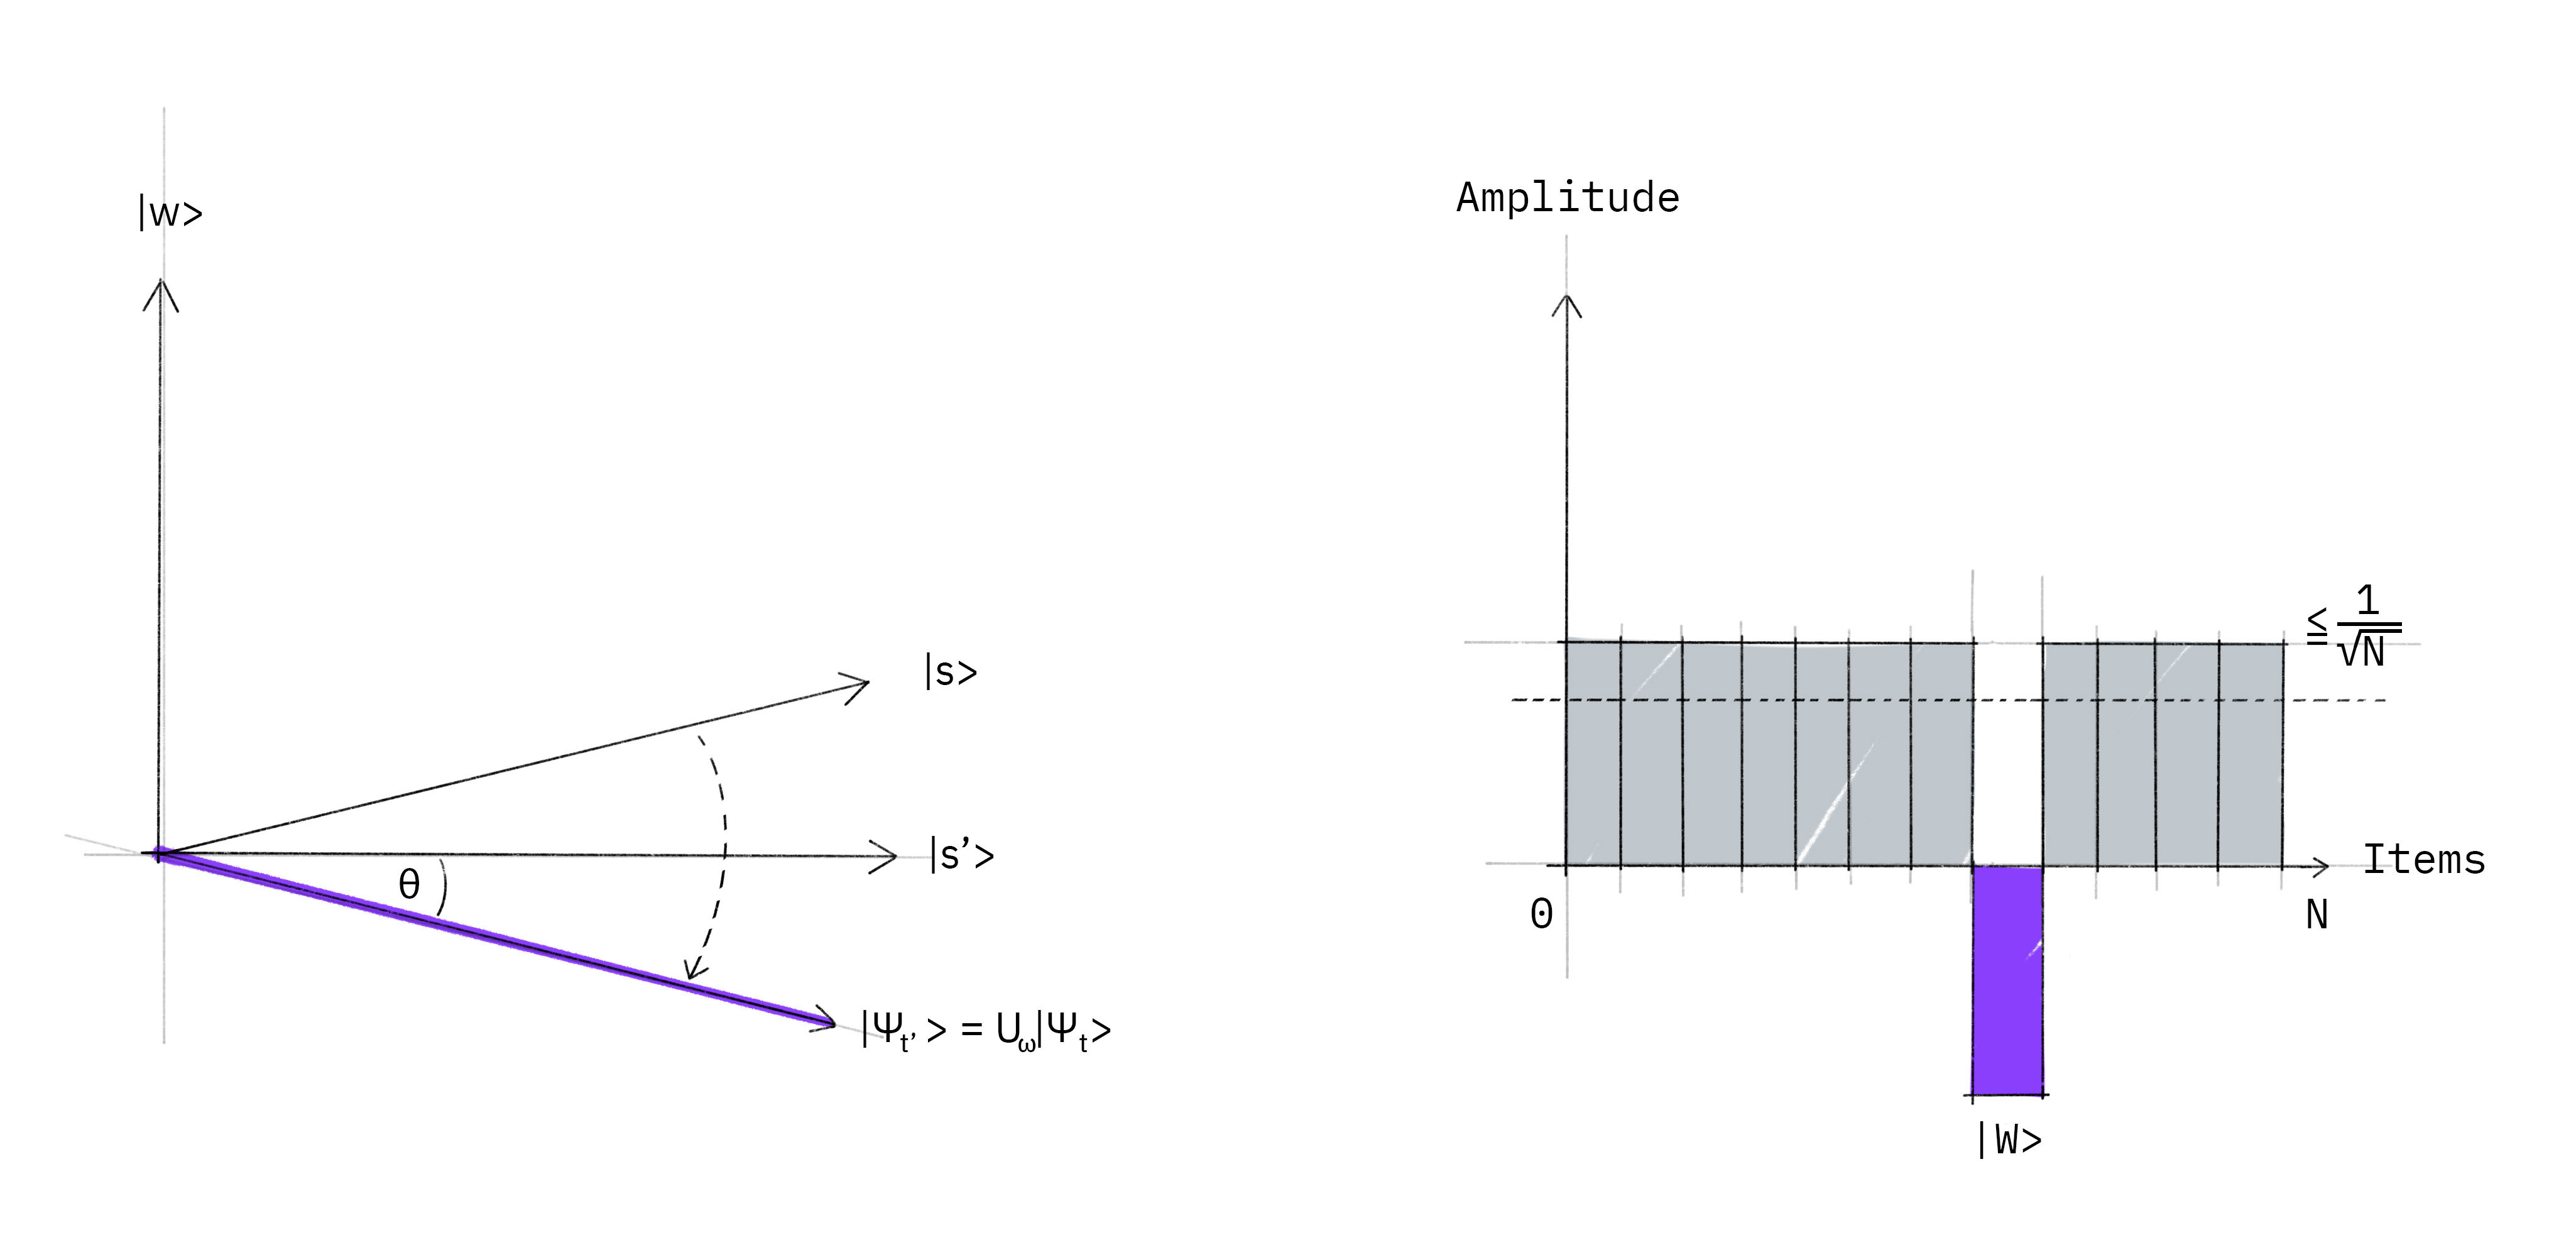

The effect of this gate is to flip the phase of $|w\rangle$, leaving the other states alone. Geometrically this corresponds to a reflection of the state $|s\rangle$ about $|s'\rangle$.

**Step 3**: We now introduce and apply a new gate $U_s$ which corresponds to reflecting a vector about $|s\rangle$:
$$U_s = 2|s\rangle\langle s| - \mathbb{1}$$.

This looks weird, I know...but just take it on faith for now that such a gate can be produced that has this effect. Furthermore, it has a name, <b>Grover's diffusion operator.</b> This gate then maps the state to $U_s U_f| s \rangle$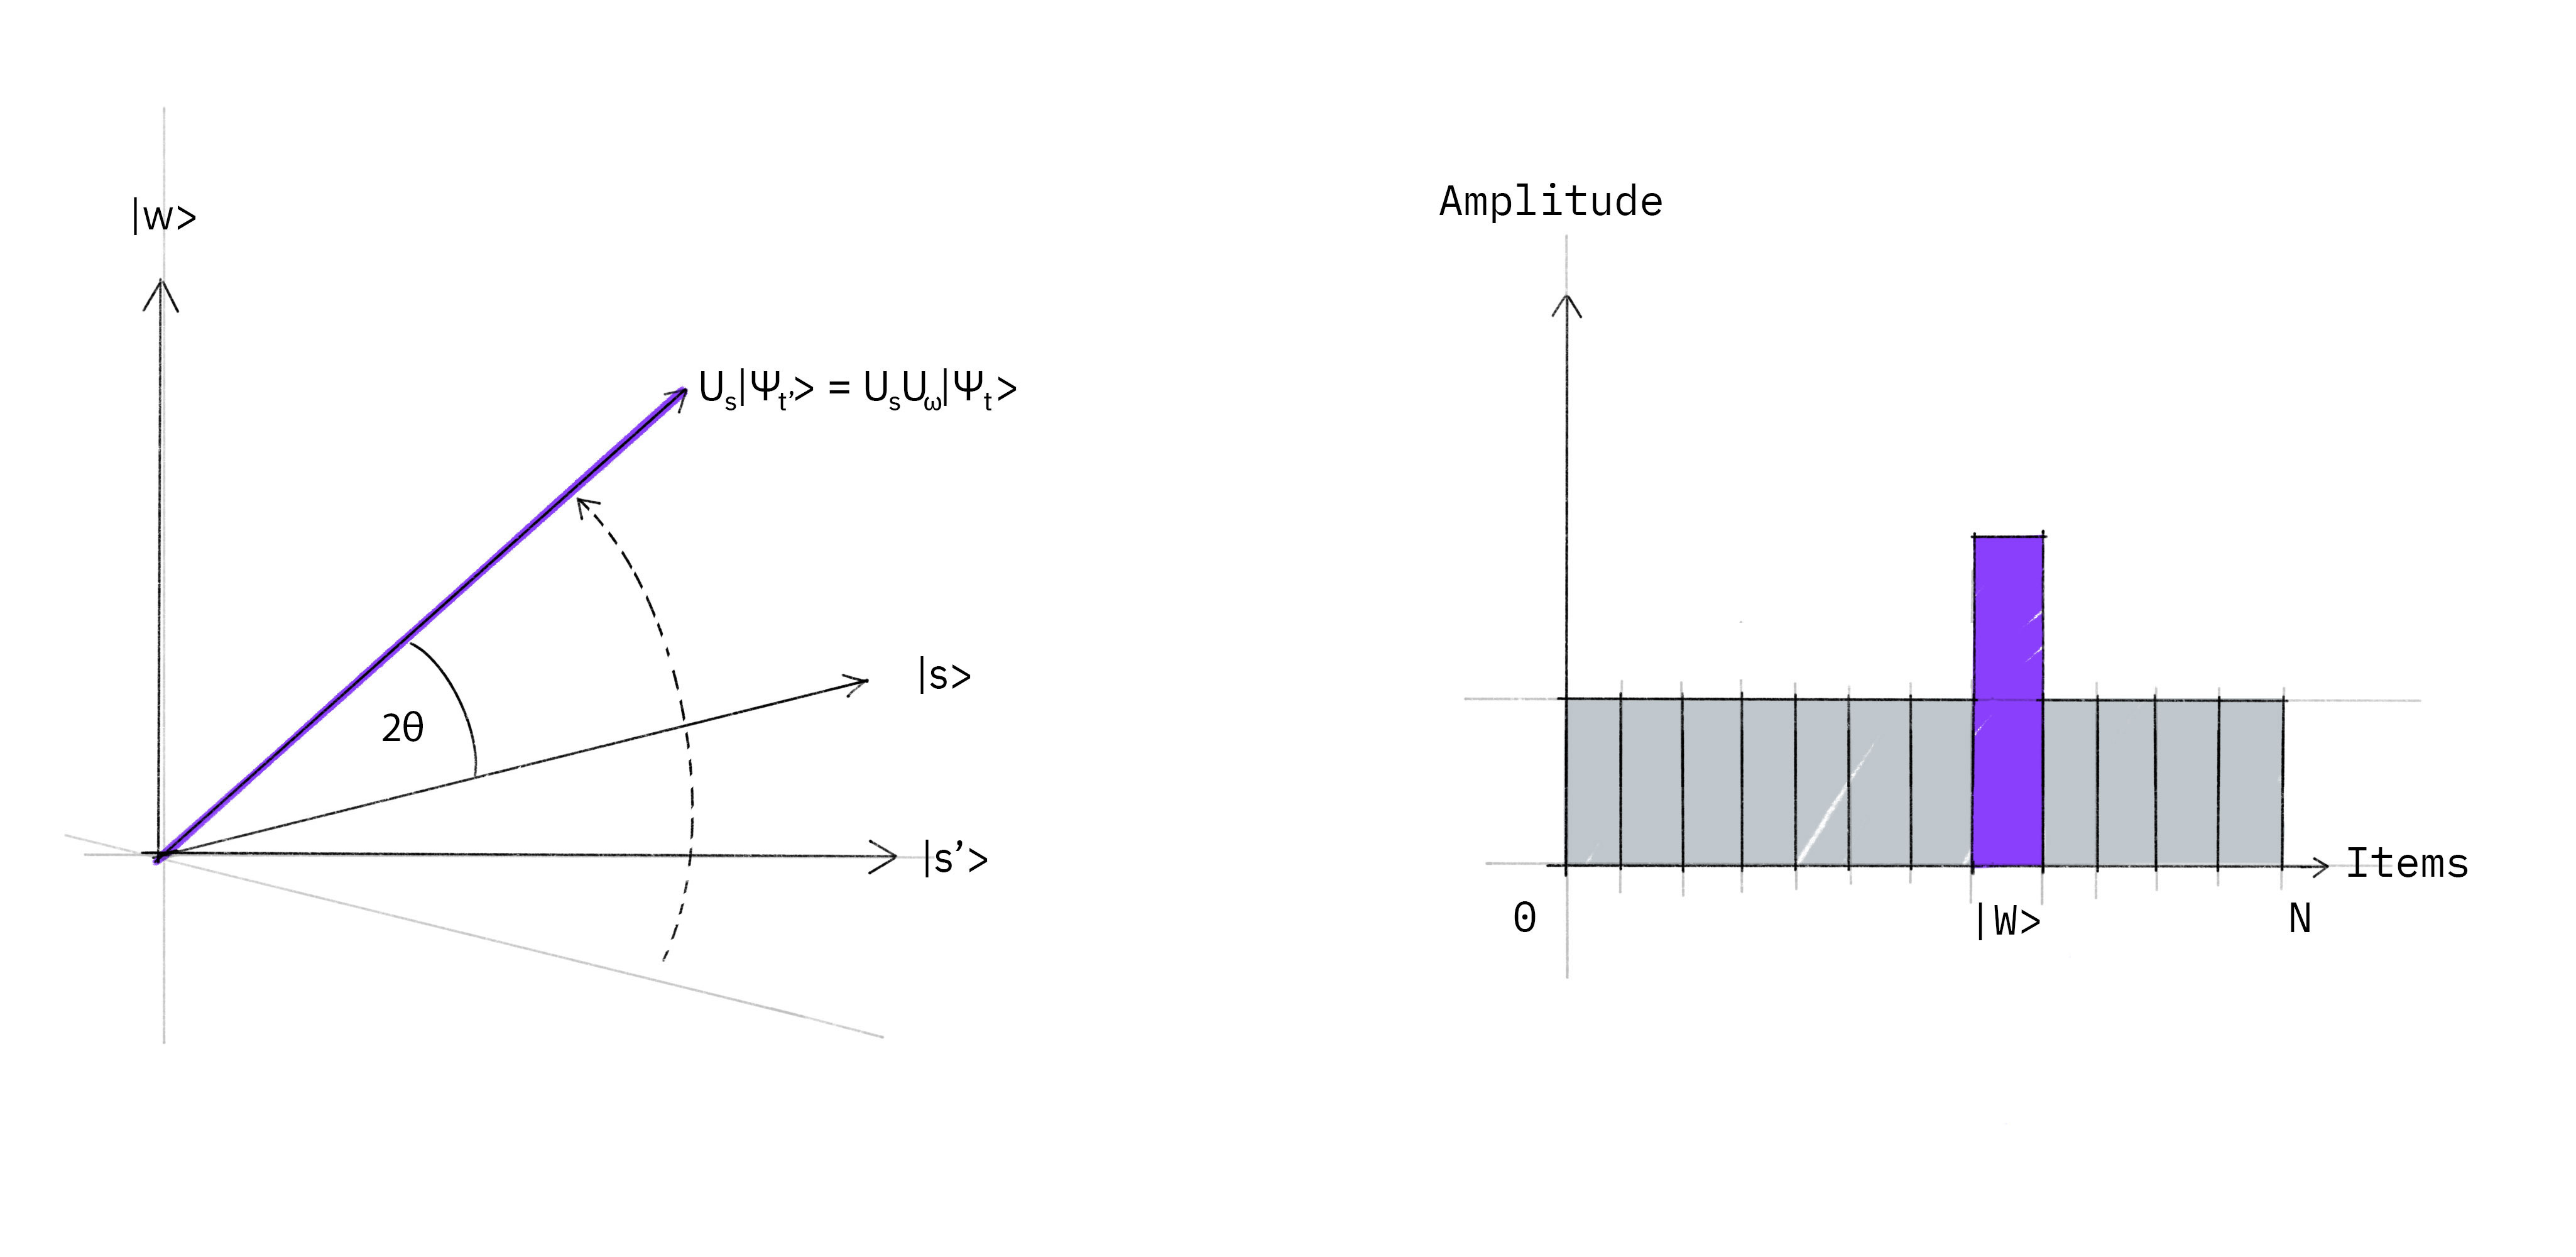

Two reflections about different axes are the same as a rotation. The effect of $U_s U_f$ is to rotates $|s\rangle$ closer to $|w\rangle$. We then <b>repeat  **step 2**</b>. This procedure will be repeated several times to zero in on $|w\rangle$ by increasing its amplitude while decreasing that of the other basis states.

After $t$ steps we will be in the state $|\psi_t\rangle$ where: $| \psi_t \rangle = (U_s U_f)^t  | s \rangle.$

How many times do we need to apply the rotation? It turns out that roughly $\sqrt{N}$ times. Looking at the amplitude of $| w \rangle$, we see it grows linearly with $\sim t N^{-1/2}$. One potential generalization is to consider when multiple solutions, $M$, exist. In that case roughly $\sqrt{(N/M)}$ gates are required.

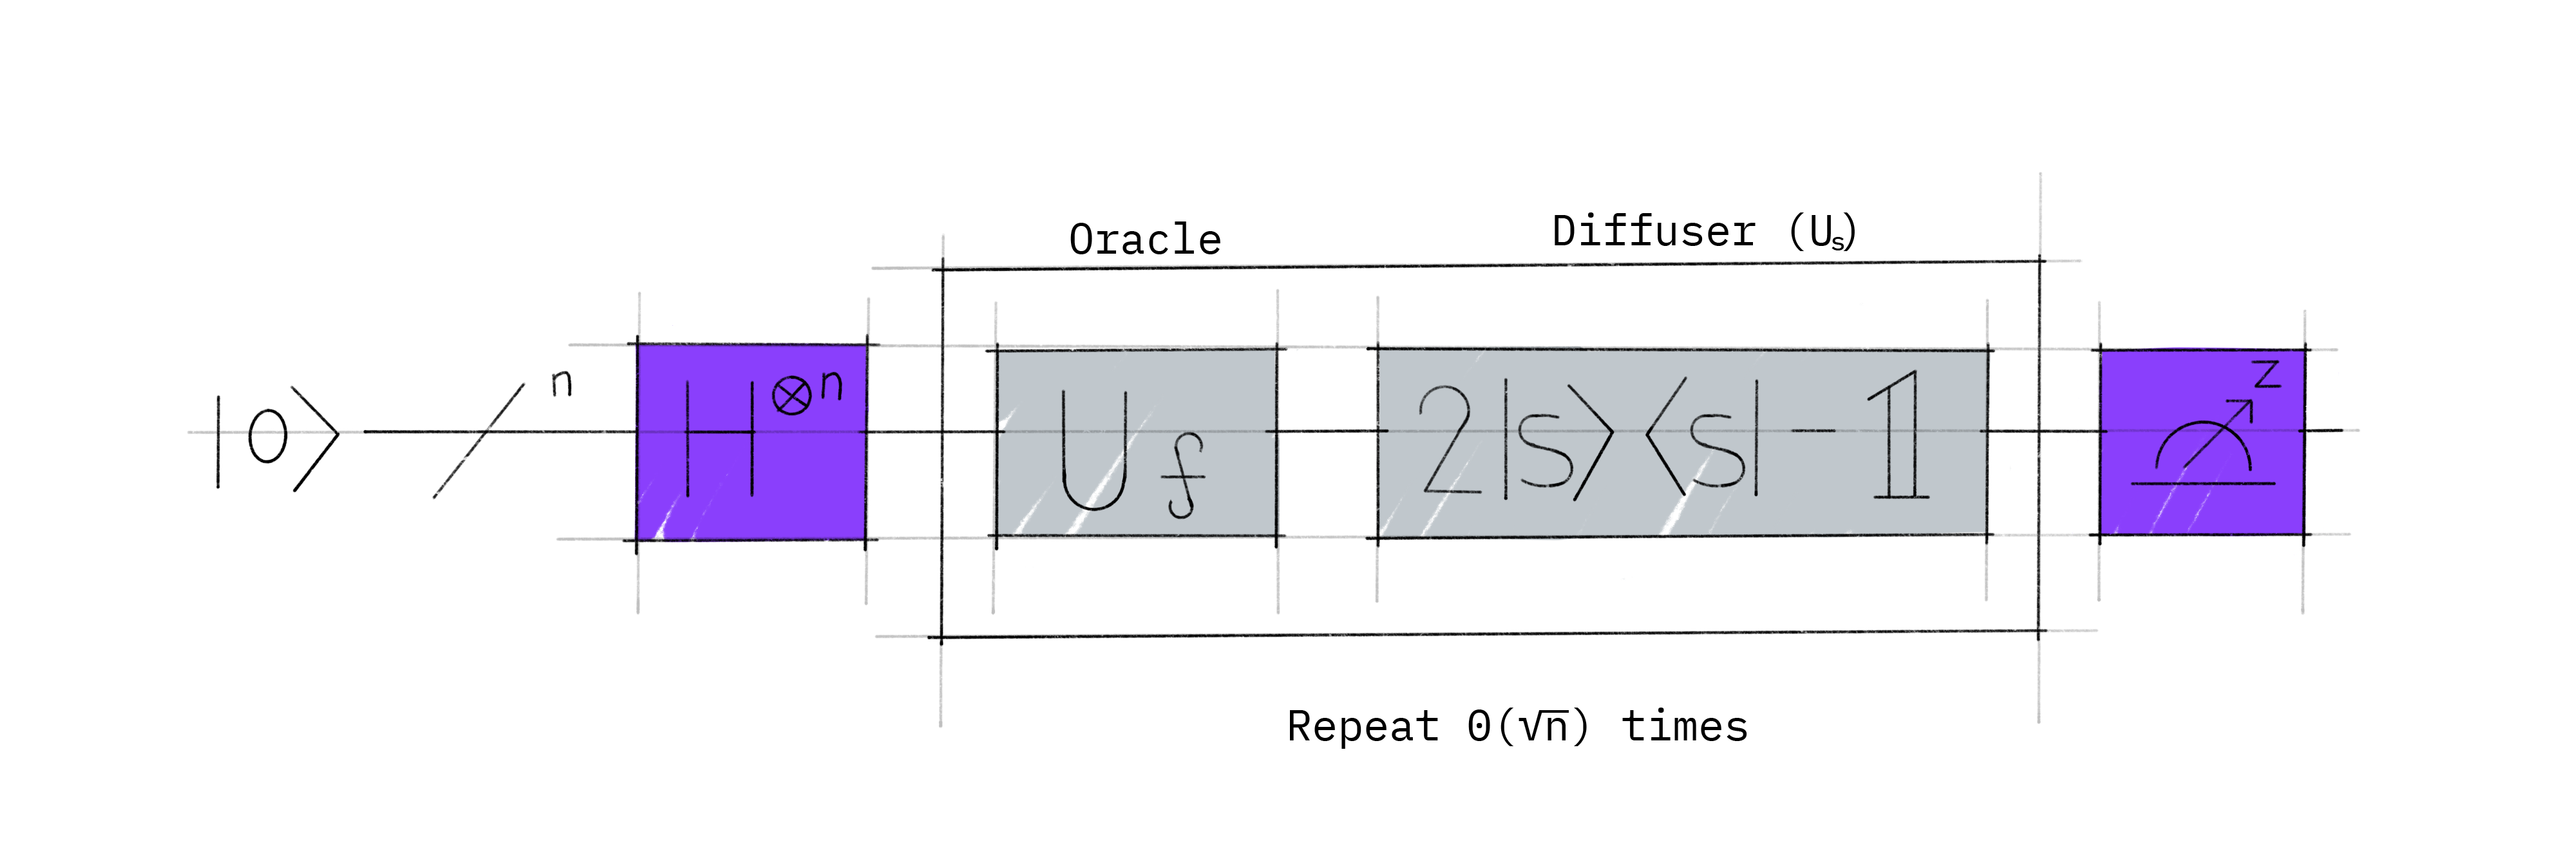

## The Case of 2 Qubits

Let's first work out Grover's algorithm for $N=4$ boxes which requires 2 qubits. In this particular case, only <b>one rotation</b> is required to rotate the initial state $|s\rangle$ to the winner $|w\rangle$:
        Remember that $|s\rangle = \sin \theta | w \rangle + \cos \theta | s' \rangle,$ where
        
$$\theta = \arcsin \langle s | w \rangle = \arcsin \frac{1}{\sqrt{N}}$$
        
In the case $N=4$, then we have

$$\theta = \arcsin \frac{1}{2} = \frac{\pi}{6}.$$

Applying amplitude applification $t$ times corresponds to $$(U_s U_\omega)^t  | s \rangle = \sin \theta_t | \omega \rangle + \cos \theta_t | s' \rangle ,$$where $$\theta_t = (2t+1)\theta.$$

In order to obtain $| \omega \rangle$ we need $\theta_t = \frac{\pi}{2}$, which with $\theta=\frac{\pi}{6}$ inserted above results to $t=1$. This implies that after $t=1$ rotation the searched element is found regardless of the oracle.

Let's work this out for a specific oracle...

#### Oracle for $\lvert \omega \rangle = \lvert 11 \rangle$
Let's look at the case $\lvert w \rangle = \lvert 11 \rangle$. The oracle $U_\omega$ in this case acts as follows:

$$U_\omega | s \rangle = U_\omega \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right) = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle - |11\rangle \right).$$

or:

$$
U_\omega =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$

which you may recognise as the controlled-z, $CZ$, gate. Thus, $U_\omega=CZ$:

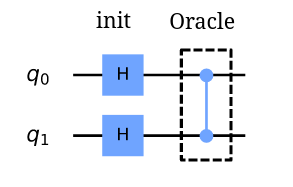

#### Reflection $U_s$
In order to complete the circuit we need to implement the additional reflection $U_s = 2|s\rangle\langle s| - \mathbb{1}$. Since this is a reflection about $|s\rangle$, we want to add a negative phase to every state orthogonal to $|s\rangle$.

One way we can do this is to use the operation that transforms the state $|s\rangle \rightarrow |0\rangle$, which we already know is the Hadamard gate applied to each qubit:

$$H^{\otimes n}|s\rangle = |0\rangle^{\otimes n}$$

Then we apply a circuit that adds a negative phase to the states orthogonal to $|0\rangle$:

$$U_0 \frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( \lvert 00 \rangle - \lvert 01 \rangle - \lvert 10 \rangle - \lvert 11 \rangle \right)$$

i.e. the signs of each state are flipped except for $\lvert 00 \rangle$. As can easily be verified, one way of implementing $U_0$ is the following circuit:

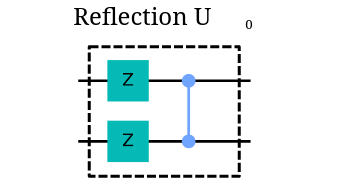

Finally, we do the operation that transforms the state $|0\rangle^{\otimes n} \rightarrow |s\rangle$ (the H-gate again):

$$H^{\otimes n}U_0 H^{\otimes n} = U_s$$

The complete circuit for $U_s$ looks like this:

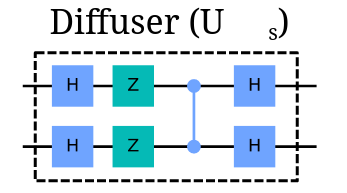


#### Full Circuit for $\lvert w \rangle = |11\rangle$
Since in the particular case of $N=4$ only one rotation is required we can combine the above components to build the full circuit for Grover's algorithm for the case $\lvert w \rangle = |11\rangle$:

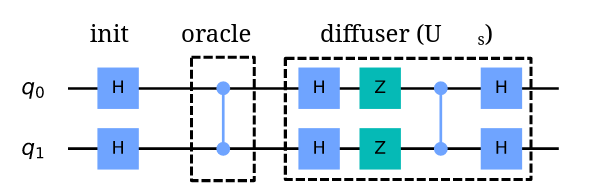

## Qiskit Implementation

We now implement Grover's algorithm for the above case of 2 qubits for $\lvert w \rangle = |11\rangle$.

First off, we need to import a bunch of things. We need:
* `plt` from `matplotlib.pyplot`
* `numpy`
* `AerSimulator` from qiskit_aer
* `QuantumCircuit`, `ClassicalRegister`, and `QuanutmRegister` from `qiskit`
* `least_busy` from `qiskit.providers.ibmq`
* `array_to_latex` and `plot_histogram` from `qiskit.visualization`
* `GenericBackendV2` and `FakeNairobiV2` from `qiskit.providers.fake_provider`
* `MCMT` and `ZGate` from qiskit.circuit.library
* from `qiskit.transpiler.preset_passmanagers` we need `generate_preset_pass_manager`
* from `qiskit_ibm_runtime` we wanna get ahold of `SamplerV2` but name it `Sampler`

In [3]:
#import all the things we need
import matplotlib.pyplot as plt

import numpy as np
# importing Qiskit
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
# from qiskit.providers.ibmq import least_busy

# import basic visualization tools
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.circuit.library import MCMT, ZGate
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler



In order to proceed, we need to implement the circuit:

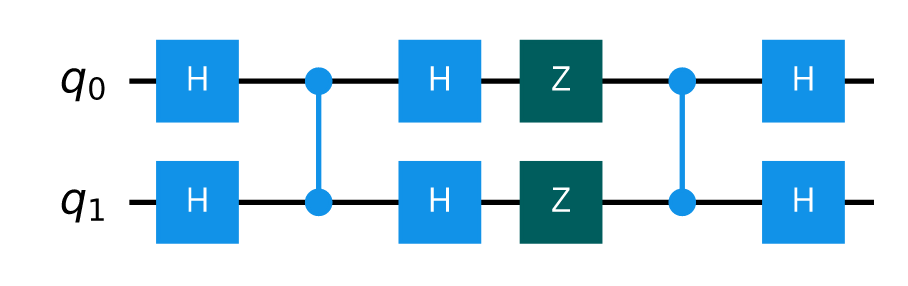

First, lets create a function `initialize_s` which prepares $|s\rangle$ -- it performs the `init` part of the circuit above. Let's have this function take in a `circuit` and <b>a list</b> `qubits`, such that we can use it in general.

You will want to do a for loop over the list, which to remind you, for an array `array` can be performed by

    for i in array:
        DO STUFF

In [4]:
def initialize_s(circuit, qubits):
  for qubit in qubits:
    circuit.h(qubit)
  return circuit

1. Now, let's test this function.  We will start by preparing a <b>quantum circuit with two qubits</b>.

2. Then, we want to <b>pass our circuit to `initialize_s` together with an array `[0,1]`</b> which tells the function that it should initialze q0 and q1.

3. Finally, <b>draw your circuit</b> to check it agrees with `init` state above in the picture

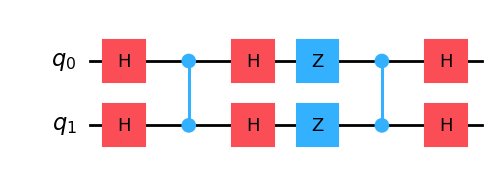

In [5]:
qc = QuantumCircuit(2)
qc = initialize_s(qc, [0,1])
qc.cz(0,1)
qc.h([0,1])
qc.z([0,1])
qc.cz(0,1)
qc.h([0,1])
qc.draw('mpl')


Now, code up the `oracle` section of the circuit:

![grover_circuit_2qubits_full_11.svg](attachment:grover_circuit_2qubits_full_11.svg)

You should need to add one new gate to your circuit, a CZ gate where $q0$ is the controls $q1$

Make sure you check that your current circuit matches the cartoon.

We now want to apply the `diffuser` ($U_s$).  For now, let's not try to get a general function, but instead just implement it gate by gate.  To do this though, lets introduce another QISKIT trick.  If you have a circuit, and want to apply any single qubit gate to a bunch of qubits at ones, you don't need to copy paste the code over and over, or create a for loop.  Instead, you can pass the one qubit gates a list of the qubits you want to apply it to:

    circuit.one_qubit_gate(list_of_qubits)

Using this trick, you should reduce your next cells line length by about half.

Hopefully, at this point your total circuit agrees exactly with this picture:


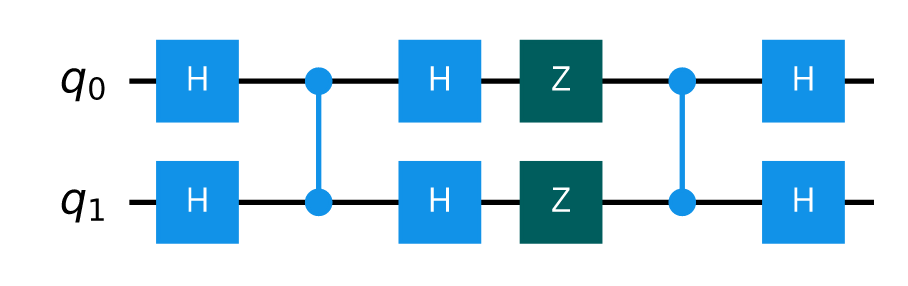

In which case, you are ready to try it on the simulator.

First, you should verify that you get the correct statevector.  To do this, you need:

* Set up a backend that is the `aer_simulator`
* Copy your circuit into a new circuit variable, so we can reuse the original latter.
* Add to your copied circuit a call to save_statevector()
* Assemble your quantum object
* Run the simulation, and store the result in a new variable
* From your results, get the state vector and store it as a new variable.
* Using `vector2latex`, print out your state vector

In [6]:
aer_simulator = AerSimulator()
qc_exp = qc.copy()

qc_exp.save_statevector()

state_vector = aer_simulator.run(qc_exp).result().get_statevector()

array_to_latex(state_vector)


<IPython.core.display.Latex object>

At this point, you should pause and check that the result you found for the state vector is in agreement with the expected result, that $|w\rangle=|11\rangle$.

Now, using the original circuit, lets look at the actual count-based output of the circuit.

* Add a call to measure_all() to your orignial circuit

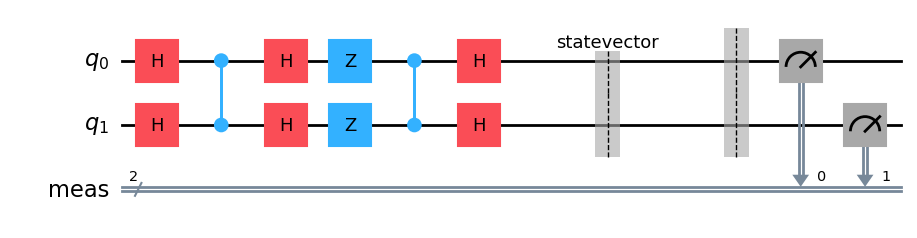

In [7]:
qc_exp.measure_all()
qc_exp.draw('mpl')

Now in the cell below,

* Assemble and run your circuit, then get the counts
* Plot the counts on a histogram

Do you see the right result all the time? Some of the time? Not at all?

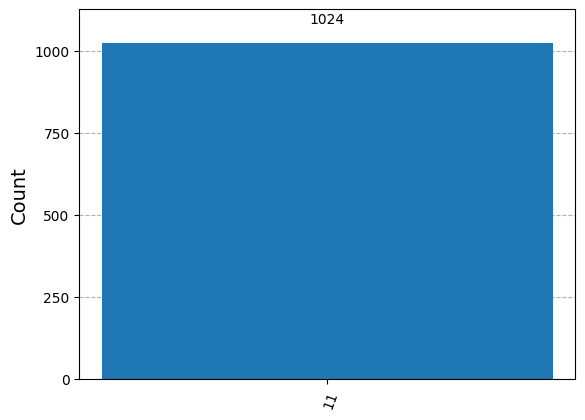

In [8]:
result = aer_simulator.run(qc_exp).result().get_counts()
plot_histogram(result)


## Running with a Noisy Simulator

Last but not least, lets try this toy example on a more realistic simulator.  You need to
* Set the backend to be a noisy simulator with GenericBackendV2 and 7 qubits
* Transpile your circuit and run the job with the Sampler

                                                                 »
ancilla_0 -> 0 ──────────────────────────────────────────────────»
               ┌───────────────┐┌────┐        ┌────┐       ┌────┐»
      q_0 -> 1 ┤ Rz(-0.093937) ├┤ √X ├──■─────┤ √X ├────■──┤ √X ├»
               └───────────────┘└────┘  │     └────┘    │  └────┘»
ancilla_1 -> 2 ─────────────────────────┼───────────────┼────────»
                ┌─────────────┐ ┌────┐┌─┴─┐┌─────────┐┌─┴─┐┌────┐»
      q_1 -> 3 ─┤ Rz(-2.8118) ├─┤ √X ├┤ X ├┤ Rz(π/2) ├┤ X ├┤ √X ├»
                └─────────────┘ └────┘└───┘└─────────┘└───┘└────┘»
ancilla_2 -> 4 ──────────────────────────────────────────────────»
                                                                 »
ancilla_3 -> 5 ──────────────────────────────────────────────────»
                                                                 »
ancilla_4 -> 6 ──────────────────────────────────────────────────»
                                                              

<ipython-input-9-e79097018ed3>:16: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend_noisy, options=options)


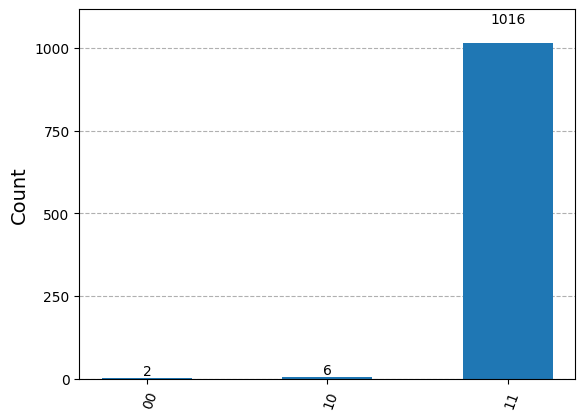

In [9]:
qc_noisy = qc.copy()
qc_noisy.measure_all()

#noisy backend
backend_noisy = GenericBackendV2(num_qubits=7,coupling_map=[[0,1],[1,2],[1,3],[3,5],[4,5],[5,6]])

#transpiling
pm = generate_preset_pass_manager(backend=backend_noisy, optimization_level=3)
transpiled_circuit = pm.run(qc_noisy)
print(transpiled_circuit)

#parameters
options = {"simulator":{"seed_simulator":42}}

#sampler
sampler = Sampler(backend=backend_noisy, options=options)

#running with the backend
result = sampler.run([transpiled_circuit]).result()

plot_histogram(result[0].data.meas.get_counts())




After your successful run:

* Store your results and plot them with a histogram

How did things end up?  Would you be confident in saying you have found the right answer?

Now lets handle the more complicated, 3 qubit case.  But in the process of writing our code, we will try and implement the more general diffuser.

## Searching for 3 Qubits

We will now consider the more complicated case of Grover's algorithm for 3 qubits when two states are winners: $\lvert101\rangle$ and $\lvert110\rangle$. The quantum circuit to solve the problem using a phase oracle is:

![grover_circuit_3qubits.png](attachment:grover_circuit_3qubits.png)

<ol>
<li>
  Apply Hadamard gates to $3$ qubits initialized to $\lvert000\rangle$ to create a uniform superposition:
  $$\lvert \psi_1 \rangle = \frac{1}{\sqrt{8}} \bigg( \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle + \lvert100\rangle + \lvert101\rangle + \lvert110\rangle + \lvert111\rangle \bigg) $$
</li>

<li>
  Mark states $\lvert101\rangle$ and $\lvert110\rangle$ using a phase oracle:
  $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{8}} \left(    \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle +    \lvert100\rangle - \lvert101\rangle - \lvert110\rangle + \lvert111\rangle \right) $$
</li>

<li>
  Perform the reflection around the average amplitude:
    
  <ol>
   <li> Apply Hadamard gates to the qubits
      $$\lvert \psi_{3a} \rangle = \frac{1}{2} \left(
        \lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right) $$
   </li>
    
   <li> Apply X gates to the qubits
      $$\lvert \psi_{3b} \rangle = \frac{1}{2} \left(
        -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle +\lvert111\rangle \right) $$
   </li>

   <li> Apply a doubly controlled Z, $CCZ$, gate between the 1, 2 (controls) and 3 (target) qubits
   $$\lvert \psi_{3c} \rangle = \frac{1}{2} \left( -\lvert000\rangle+\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)$$
   </li>

   <li> Apply X gates to the qubits
      $$\lvert \psi_{3d} \rangle = \frac{1}{2} \left(
        -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right) $$
   </li>
   <li> Apply Hadamard gates to the qubits
      $$\lvert \psi_{3e} \rangle = \frac{1}{\sqrt{2}} \left(
        -\lvert101\rangle -\lvert110\rangle \right) $$
   </li>
  </ol>
</li>

<li>
  Measure the $3$ qubits to retrieve states $\lvert101\rangle$ and $\lvert110\rangle$
</li>
</ol>

In principle, we may need to repeatly apply $U_sU_\omega$.  But for such a simple circuit, you should be able to work out how many is the maximum required.  Lets try and work that out:  First, we need to compute $\langle s|w\rangle$, and then get $\theta$ from   $\theta=\arcsin \langle s | w \rangle$


In [10]:
#Define s as a normalized superposition of all 8 basis vectors.  A handy way to create
# arrays of all ones is np.ones(length_of_array)
s = np.ones(8) * 1/(np.sqrt(8))

#Define w as the normalized superposition of |101> and |110>
w = np.array([0,0,0,0,0,1,1,0]) * 1/(np.sqrt(2))

#Now, take the dot product of your two vectors, where the function np.dot(a,b) returns
#the dot product of vectors a,b
#Store this variable as dot_sw
dot_sw = np.dot(s,w)
#Determine theta
theta = np.arcsin(dot_sw)

#print theta.  Note that it is in radians
print(f'theta: {theta}')

theta: 0.5235987755982987


Is the number close to $\frac{\pi}{6}\approx0.524$?  If so, hurray for right answers.

So this is the angle away from the $|s'\rangle$ axis in the $|s'\rangle$ vs. $|w\rangle$ plane $|s\rangle$ is.

Applying amplitude applification $t$ times corresponds to $$(U_s U_\omega)^t  | s \rangle = \sin \theta_t | \omega \rangle + \cos \theta_t | s' \rangle$$  Given this, we obtain success when $\theta_t=\pi/2$.  Given that $$\theta_t = (2t+1)\theta.$$
we can solve for $t$ by using our starting value of $\theta$.  Rearranging, you should find that $$t=\frac{\theta_t}{2\theta}-\frac{1}{2}$$


In [11]:
#Solve for t given the now known values of $\theta_t=\pi/2$ and $\theta=\pi/6$
t = ((np.pi/2) / (2*theta))- (1/2)
print(t)

1.0000000000000004


Here's hoping you got $t=1$, in which case it means we should get the right solution vector after only one iteration. This is because while there are more possibities with 3 qubits (8 basis states, which lowers the initial amplitudie in any given state) because there are 2 solutions, the maximum amplitude we're seeking is smaller.

### Onward to Qiskit

We now implement Grover's algorithm for $3$-qubits and searching for two marked states $\lvert101\rangle$ and $\lvert110\rangle$. **Note:** Remember that Qiskit orders it's qubits the opposite way round to this resource, so the circuit drawn will appear flipped about the horizontal.

You should create a phase oracle that will mark states $\lvert101\rangle$ and $\lvert110\rangle$ that follows the circuit `oracle` in the picture:

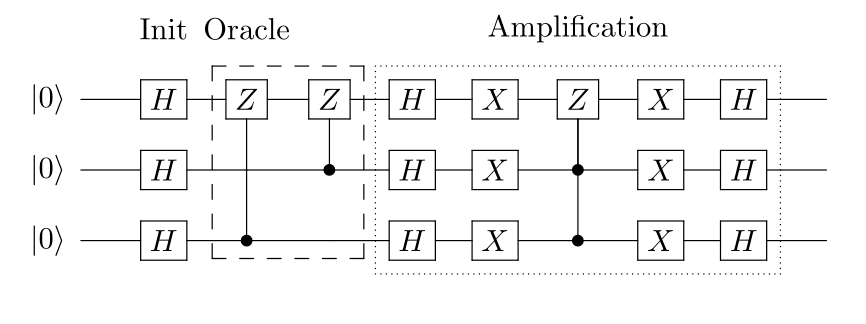

This time though, instead of making a function, let's just define a new gate using the

    circuit.to_gate()


In [12]:
#define a quantum circuit with 3 qubits
qc3 = QuantumCircuit(3)
#perform whatever gates you need to produce the oracle
for i in range(3):
  qc3.h(i)

qc3.cz(2,0)
qc3.cz(1,0)

#define a new gate `oracle_ex3` using the to_gate() for the circuit you defined in this cell
oracle_ex3 = qc3.to_gate()

#use the .name function on oracle_ex3 to give your new game a name. The syntax is gate.name = "whatever you want"
oracle_ex3.name = "n_gate"

In the last section, we used a diffuser specific to 2 qubits, in the cell below we will create a general diffuser for any number of qubits.

## Creating a General Diffuser
    
Remember that we can create $U_s$ from $U_0$ (which applies a phase to every state not equal to $|0\rangle^{\otimes n}$:

$$ U_s = H^{\otimes n} U_0 H^{\otimes n} $$

And a multi-controlled-Z gate ($MCZ$) inverts the phase of the state $|11\dots 1\rangle$:

$$
MCZ =
\begin{bmatrix}
 1 & 0 & 0 & \cdots & 0 \\
 0 & 1 & 0 & \cdots & 0 \\
 \vdots & \vdots & \vdots & \ddots & \vdots \\
 0 & 0 & 0 & \cdots & -1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\leftarrow \text{Add negative phase to} \; |11\dots 1\rangle\\
\end{aligned}
$$

Applying an X-gate to each qubit performs the transformation:

$$
\begin{aligned}
X^{\otimes n}|00\dots 0\rangle & \rightarrow |11\dots 1\rangle\\
X^{\otimes n}|11\dots 1\rangle & \rightarrow |00\dots 0\rangle
\end{aligned}
$$

So:

$$ U_0 = - X^{\otimes n} (MCZ) X^{\otimes n} $$

Using these properties together, we can create $U_s$ using H-gates, X-gates, and a single multi-controlled-Z gate:

$$ U_s = - H^{\otimes n} U_0 H^{\otimes n} = H^{\otimes n} X^{\otimes n} (MCZ) X^{\otimes n} H^{\otimes n} $$
    
Note that we can ignore the global phase of -1.

<b>To get an $MCZ$ gate we need to use sandwich a Multi-controlled Toffoli $MCX$ gate between 2 Hadamards acting on the target qubit.</b>  The syntax for and MCX is
    
    circuit.mcx(list_of_control_qubits, target)

In [13]:
#Define a function diffuser that takes in the number of qubits, and returns a gate U_s.
#You will need for loops to apply H and X before and after the H*MCT*H gates.  The
#Multi-controlled Toffoli should use all but the last qubit as controls, and the last
#Qubit as the target

def general_diffuser(qubits):

    #Lots of code here
    U_s = QuantumCircuit(qubits)

    # Apply transformation |s> -> |00..0> (H-gates)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(qubits):
      U_s.h(qubit)
      U_s.x(qubit)
    # Do multi-controlled-Z gate
    U_s.h(qubits-1)

    U_s.mcx([i for i in range(qubits-1)], qubits-1)

    U_s.h(qubits-1)

    # Apply transformation |11..1> -> |00..0>
    for qubit in range(qubits):
      U_s.x(qubit)
      U_s.h(qubit)

    # Apply transformation |00..0> -> |s>
    print(U_s)
    # You want to return the diffuser as a gate, and name it "U$_s$"
    UU_s = U_s.to_gate()

    UU_s.name = "UU_s"

    # Return your circuit
    return UU_s




     ┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘


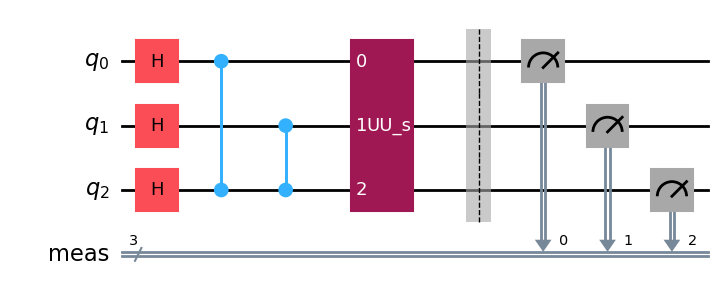

In [14]:
#define a quantum circuit with 3 qubits
qc3 = QuantumCircuit(3)
#perform whatever gates you need to produce the oracle
for i in range(3):
  qc3.h(i)

qc3.cz(0,2)
qc3.cz(1,2)

#define a new gate `oracle_ex3` using the to_gate() for the circuit you defined in this cell
oracle_ex3 = qc3.to_gate()

#use the .name function on oracle_ex3 to give your new game a name. The syntax is gate.name = "whatever you want"
oracle_ex3.name = "n_gate"

U_s = general_diffuser(3)
qc3.append(U_s, [0,1,2])

qc3.measure_all()
qc3.draw('mpl')

Let's now put the pieces together, with the creation of a uniform superposition at the start of the circuit and a measurement of all the qubits at the end. Remember how many iterations of diffuser we need to use.  Probably smart to draw the circuit too, to check if it agrees with:

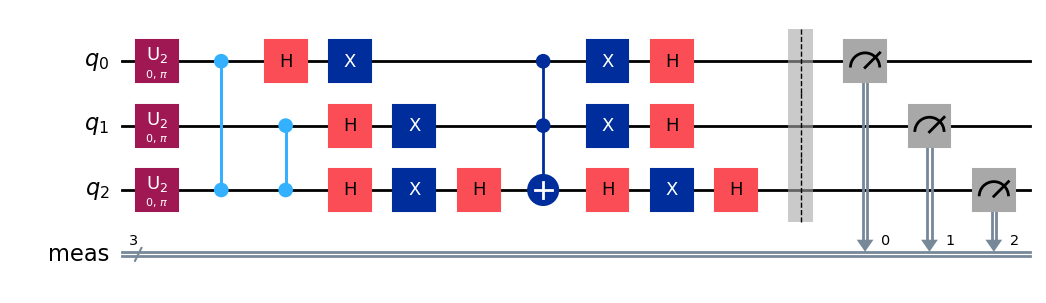

If you are happy with your circuit, run it on the `AerSimulator` and plot the histogram

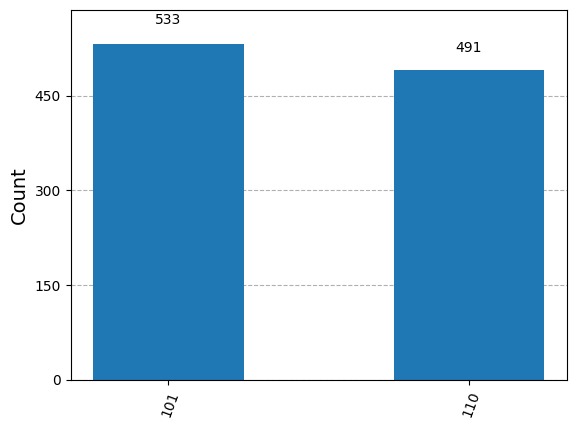

In [15]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
transpiled_circuit = pm.run(qc3)
result = backend.run(transpiled_circuit).result()
plot_histogram(result.get_counts())


Did the algorithm discovers the winners, $\lvert101\rangle$ and $\lvert110\rangle$?  With what probability did each get determined with.

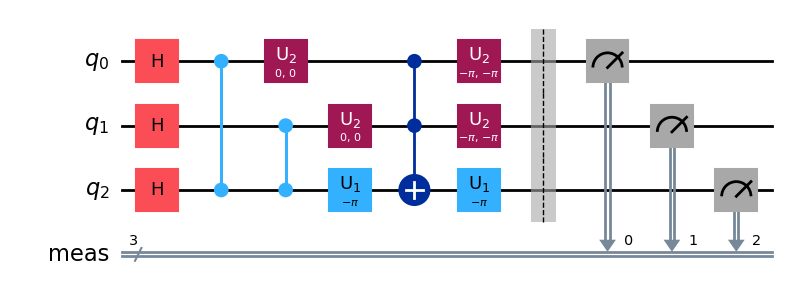

In [16]:
transpiled_circuit.draw('mpl')

## How about a noisy device?

Load up the GenericBackendV2 with 7 qubits and a coupling map of `[[0,1],[1,2],[1,3],[3,5],[4,5],[5,6]]` for the I connectiviy graph, transpile, and run.  Get the histogram and compare it to your expectations.  To be sensible, don't store your results and plot them in the same cell as running the code.

In [17]:
pm = generate_preset_pass_manager(backend=backend_noisy, optimization_level=3)
transpiled_circuit = pm.run(qc3)
result = backend_noisy.run(transpiled_circuit).result()

You might see there is a higher chance of measuring $\lvert101\rangle$ and $\lvert110\rangle$.  As a method for error mitigation, lets rerun the code, and perform the results through plot steps in a new cell below here:

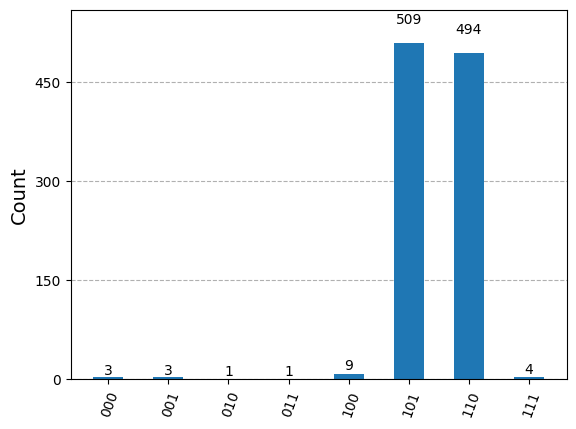

In [18]:
plot_histogram(result.get_counts())

Hopefully, you still see that $|101\rangle$ and $|110\rangle$ dominate.  But how did the various other basis states' amplitudes change on return?  Where $|101\rangle$ and $|110\rangle$ consistently at the same value?

## Broad Problems to Solve<a id='problems'></a>

The function `grover_oracle` below takes a list of states e.g. ["101","011"] and oracle for these states for use in a Grover search. The list needs to be a string, with all elements of the same length because internally it will use the length of the elements to determine the circuit size.

In [19]:
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    From https://learning.quantum.ibm.com/tutorial/grovers-algorithm

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

In the next cell, we implement code that can produce a random set of `nstates` that will be marked in a list that is stored in `nqubits`.

In [28]:
def random_marked_states(nqubits,nstates):
  marked_states=[]
  while len(marked_states) < nstates:
    xs=np.random.randint(2, size=nqubits)
    s=''.join(str(x) for x in xs)
    marked_states.append(s) if s not in marked_states else marked_states
  return marked_states

In the next cell:
* Define two variables `nqubits` and `nstates` to 4 and 1 respectively.
* Call `marked_states` with these variables and store the resulting array
* Define a gate variable `oracle` by calling `grover_oracle` with your marked states variable
* Create a circuit of size `nqubits` and append the oracle to it.
* Draw your circuit, and see what you get

     ┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘
     ┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘
     ┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌

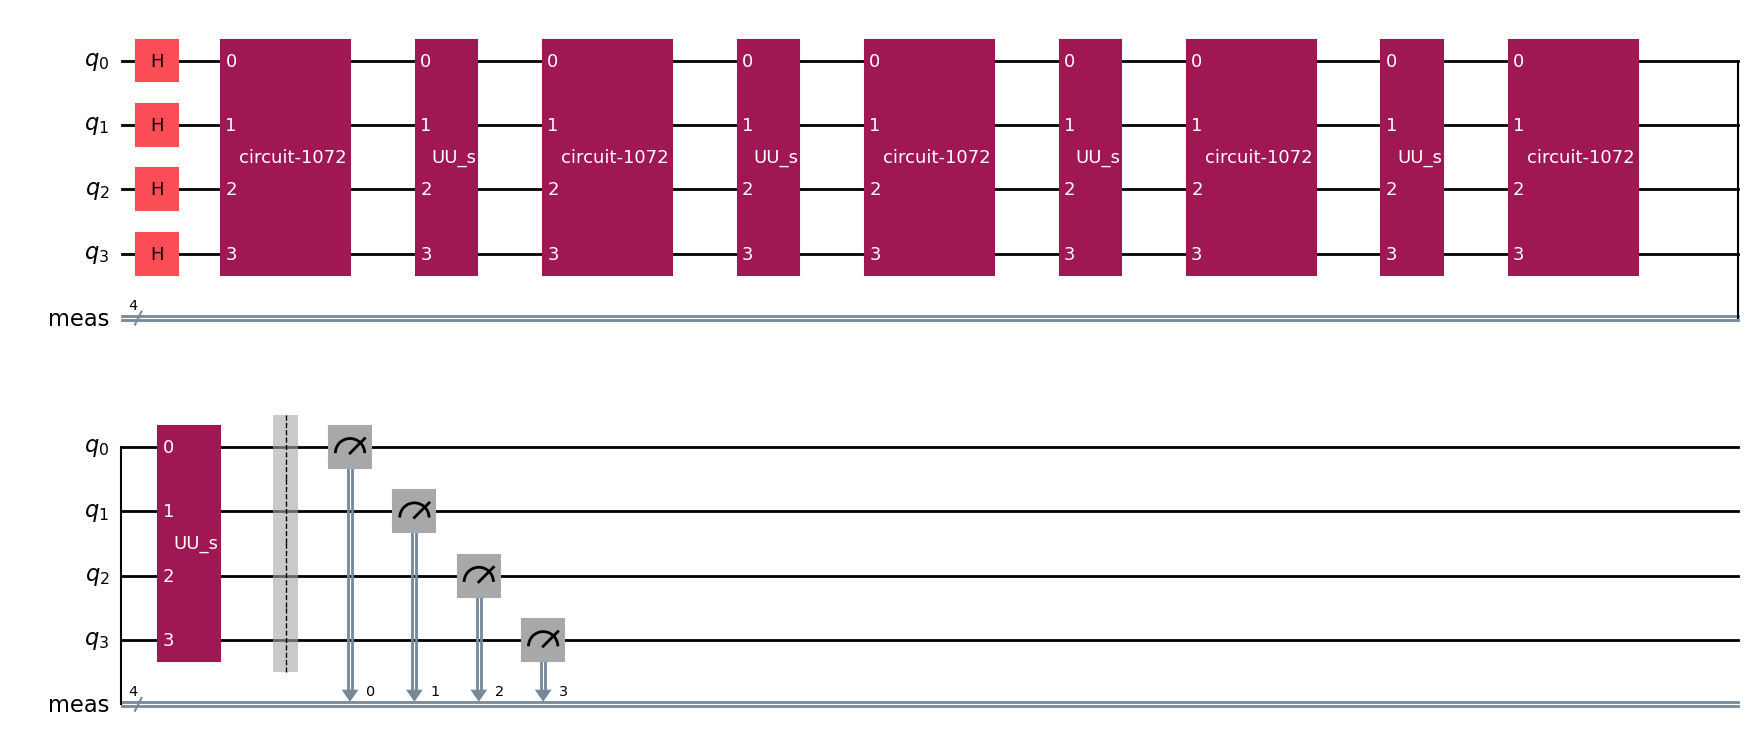

In [31]:
nqubits = 4
nstates = 1
marked_states = random_marked_states(nqubits, nstates)

oracle = grover_oracle(marked_states)
qc = QuantumCircuit(nqubits)
qc = initialize_s(qc, range(nqubits))
for i in range(5):
  qc.append(oracle, range(nqubits))
  qc.append(general_diffuser(nqubits), range(nqubits))
qc.measure_all()
qc.draw('mpl')

1. `grover_oracle(4, 1)` uses 4 qubits and has 1 solution.    
   a. How many iterations do we need to have a > 90% chance of measuring this solution?    
   b. Use Grover's algorithm to find this solution state via the simulator.
   c. What happens if we apply more iterations the number we calculated in problem 1a above? Why?
   
   <b>Note, you may need more than the one cell provided to answer all these. In that case, create new cells</b>

In [34]:
import math

def num_of_iters(nqubits, nsolutions):
  s = np.ones(2**nqubits) * 1/(np.sqrt(2**nqubits))
  w = np.zeros(2**nqubits)
  for i in range(nsolutions):
    w[i] = 1
  theta = np.arcsin(np.dot(s,w))
  t = ((np.pi/2) / (2*theta))- (1/2)
  return math.ceil(t)

print(num_of_iters(4, 2))

1


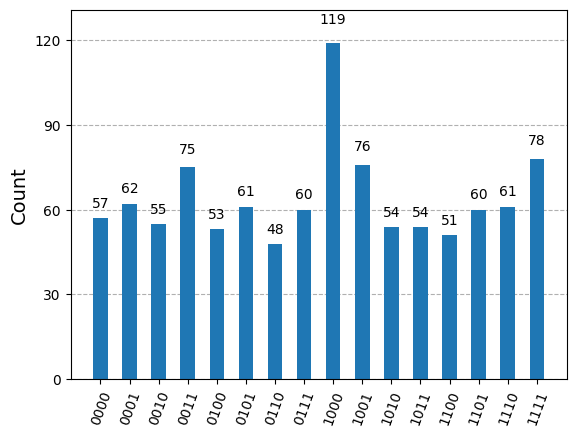

In [32]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
transpiled_circuit = pm.run(qc)
result = backend.run(transpiled_circuit).result()
plot_histogram(result.get_counts())

     ┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘


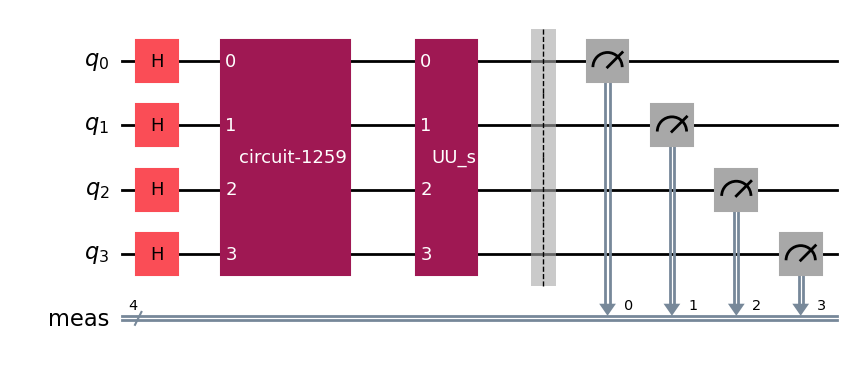

In [37]:
nqubits = 4
nstates = 2
marked_states = random_marked_states(nqubits, nstates)

oracle = grover_oracle(marked_states)
qc = QuantumCircuit(nqubits)
qc = initialize_s(qc, range(nqubits))
for i in range(num_of_iters(nqubits, nstates)):
  qc.append(oracle, range(nqubits))
  qc.append(general_diffuser(nqubits), range(nqubits))
qc.measure_all()
qc.draw('mpl')

2. With 2 solutions and 4 qubits, how many iterations do we need for a >90% chance of measuring a solution? Test your answer using the oracle `grover_oracle()` (where marked states has two solutions).

   <b>Note, you may need more than the one cell provided to answer all these. In that case, create new cells</b>

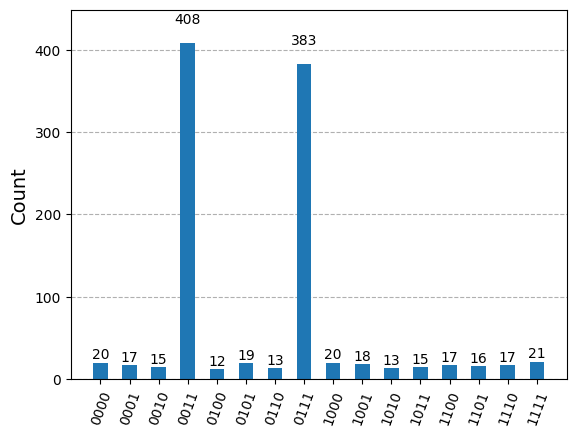

In [38]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
transpiled_circuit = pm.run(qc)
result = backend.run(transpiled_circuit).result()
plot_histogram(result.get_counts())